## Dashboards

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dash
from dash import html, dcc
from dash.dependencies import Input, Output, State
import plotly.graph_objects as go
import plotly.express as px
from dash import no_update
import datetime as dt

In [2]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.drop(columns=['Unnamed: 0']).head()

,Flight Number,Launch Site,class,Payload Mass (kg),Booster Version,Booster Version Category
0,1,CCAFS LC-40,0,0.0,F9 v1.0 B0003,v1.0
1,2,CCAFS LC-40,0,0.0,F9 v1.0 B0004,v1.0
2,3,CCAFS LC-40,0,525.0,F9 v1.0 B0005,v1.0
3,4,CCAFS LC-40,0,500.0,F9 v1.0 B0006,v1.0
4,5,CCAFS LC-40,0,677.0,F9 v1.0 B0007,v1.0


In [5]:
df['Launch Site'].value_counts()

Launch Site
CCAFS LC-40     26
KSC LC-39A      13
VAFB SLC-4E     10
CCAFS SLC-40     7
Name: count, dtype: int64

In [6]:
app = dash.Dash(__name__)
app.config.suppress_callback_exceptions = True

app.layout = html.Div([html.H1('SpaceX Launch Records Dashboard',style={'textAlign': 'center', 'color': '#503D36',
                                'font-size': 26}),
                       html.Div([
                           dcc.Dropdown(id='site-dropdown', options=[
                               {'label': 'All Sites', 'value':'ALL'},
                               {'label': 'CCAFS LC-40', 'value':'CCAFS LC-40'},
                               {'label': 'KSC LC-39A', 'value':'KSC LC-39A'},
                               {'label': 'VAFB SLC-4E', 'value':'VAFB SLC-4E'},
                               {'label': 'CCAFS SLC-40', 'value':'CCAFS SLC-40'}],
                                 placeholder='Select the site', style={'textAlign': 'center', 'width': '100%','font-size': 26}, 
                                )]
                               ),
                           
                       html.Br(),
                        html.Div([
                            dcc.Graph(id='succes-pie',figure={})
                            
                        ]),

                       html.Div([
                            dcc.RangeSlider(id='payload-slider',
                                min=0, max=10000, step=1000,
                                marks={0: '0',
                                       100: '100'},
                                value=[df['Payload Mass (kg)'].min(), df['Payload Mass (kg)'].max()])
                        ]),
                       html.Div([
                            dcc.Graph(id='output-container-range-slider',figure={})
                            
                        ])
                     ])


@app.callback(
    [Output('succes-pie', 'figure'),
     Output('output-container-range-slider', 'figure')],
    [Input('site-dropdown', 'value'),
     Input('payload-slider', 'value')]
)
def update_graphs(entered_site, payload_range):

    filtered_df = df[(df['Payload Mass (kg)'] >= payload_range[0]) & 
                     (df['Payload Mass (kg)'] <= payload_range[1])]
    
    if entered_site == 'ALL':
        fig_pie = px.pie(filtered_df, values='class', 
                         names='Launch Site', 
                         title='Success Rate by Launch Site')
    else:
        filtered_df = filtered_df[filtered_df['Launch Site'] == entered_site]
        fig_pie = px.pie(filtered_df,                          names='class', 
                         title=f'Success Rate for {entered_site}')
    
    fig_scatter = px.scatter(filtered_df, x='Payload Mass (kg)', 
                             y='class', 
                             title='Payload vs. Outcome',
                             color='Booster Version Category')
    
    return fig_pie, fig_scatter


if __name__ == '__main__':
    app.run_server(debug=True)


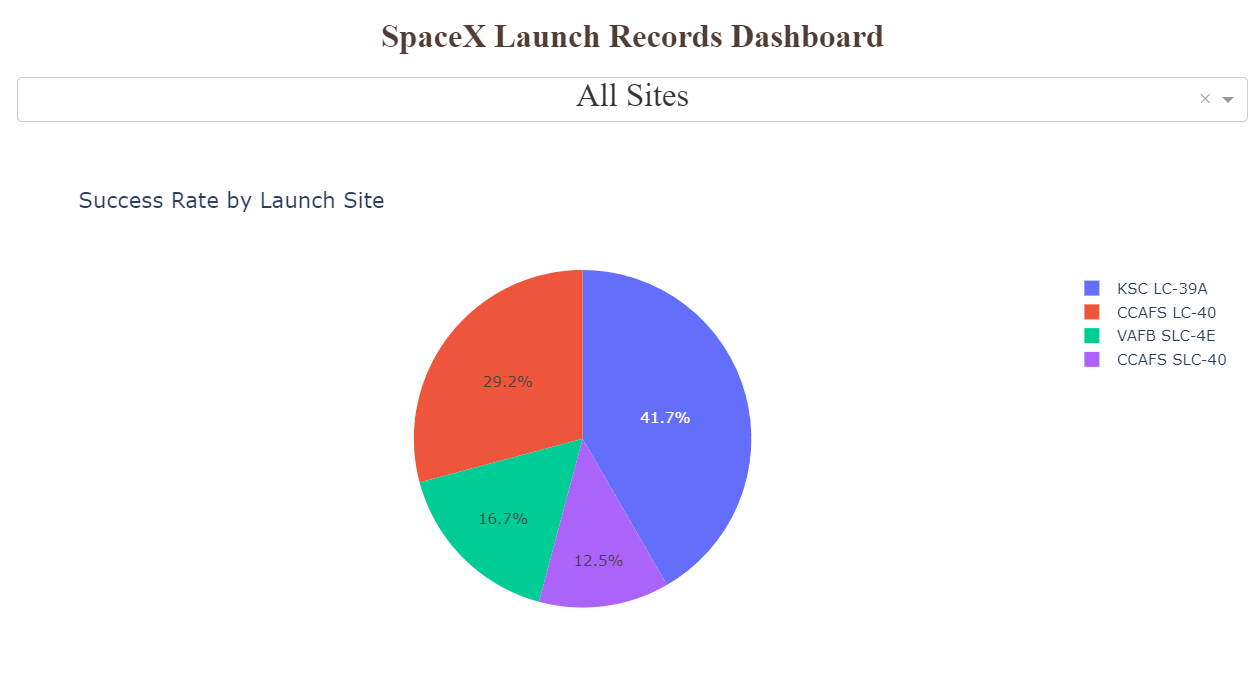
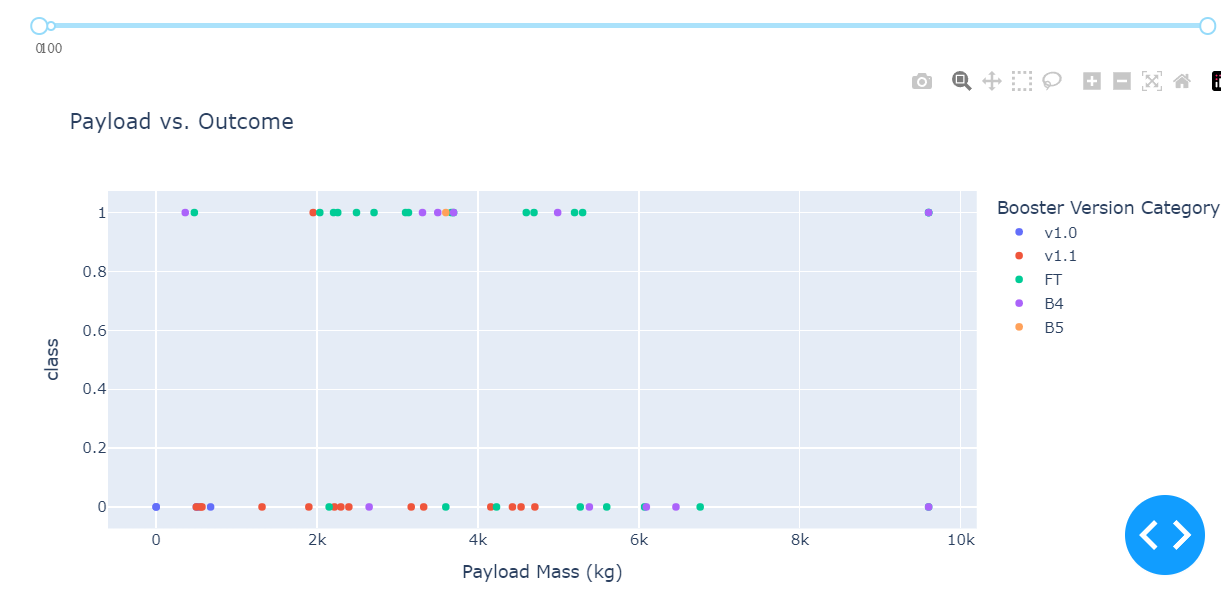